In [22]:
import json
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image

In [41]:
file = Path("./").glob("data/*.json")

In [42]:
labels = []
bboxs = []
images = []

for i in file:
    with open(i,"r") as f:
        label = []
        bbox = []
        content = json.load(f)
        for val in  content['shapes']:
            label.append(val['label'])
            x,y = [],[]
            for j in val['points']:
                x.append(j[0])
                y.append(j[1])
            bbox.append([min(x),min(y),max(x),max(y)])
        labels.append(label)
        bboxs.append(bbox)
    
    print(i)
    image_path = str(i).replace("json","jpg")
    image = Image.open(image_path)
    images.append(image)

data/train_0196.json
data/train_0508.json
data/train_0553.json


In [19]:

for i in  content['shapes']:
    labels.append(i['label'])
    x,y = [],[]
    for j in i['points']:
        x.append(j[0])
        y.append(j[1])
    bboxs.append([min(x),min(y),max(x),max(y)])
    

In [25]:
def bbox_to_rect(bbox, color):
    # 将边界框(左上x,左上y,右下x,右下y)格式转换成matplotlib格式：
    # ((左上x,左上y),宽,高)
    return plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
        fill=False, edgecolor=color, linewidth=2)


def show_bboxes(axes, bboxes, labels=None, colors=None):
    """显示所有边界框"""

    # print(len(bboxes.shape),bboxes.shape)
    # if len(bboxes.shape) > 2:
    #     for i in bboxes:
    #         show_bboxes(axes,i,labels.copy(),colors)
    #     return 
    
    def _make_list(obj, default_values=None):
        if obj is None:
            obj = default_values
        elif not isinstance(obj, (list, tuple)):
            obj = [obj]
        return obj

    labels = _make_list(labels)
    colors = _make_list(colors, ['b', 'g', 'r', 'm', 'c'])
    for i, bbox in enumerate(bboxes):
        color = colors[i % len(colors)]
        rect = bbox_to_rect(bbox, color)
        # print(rect)
        axes.add_patch(rect)
        if labels and len(labels) > i:
            text_color = 'k' if color == 'w' else 'w'
            axes.text(rect.xy[0], rect.xy[1], labels[i],
                      va='center', ha='center', fontsize=9, color=text_color,
                      bbox=dict(facecolor=color, lw=0))

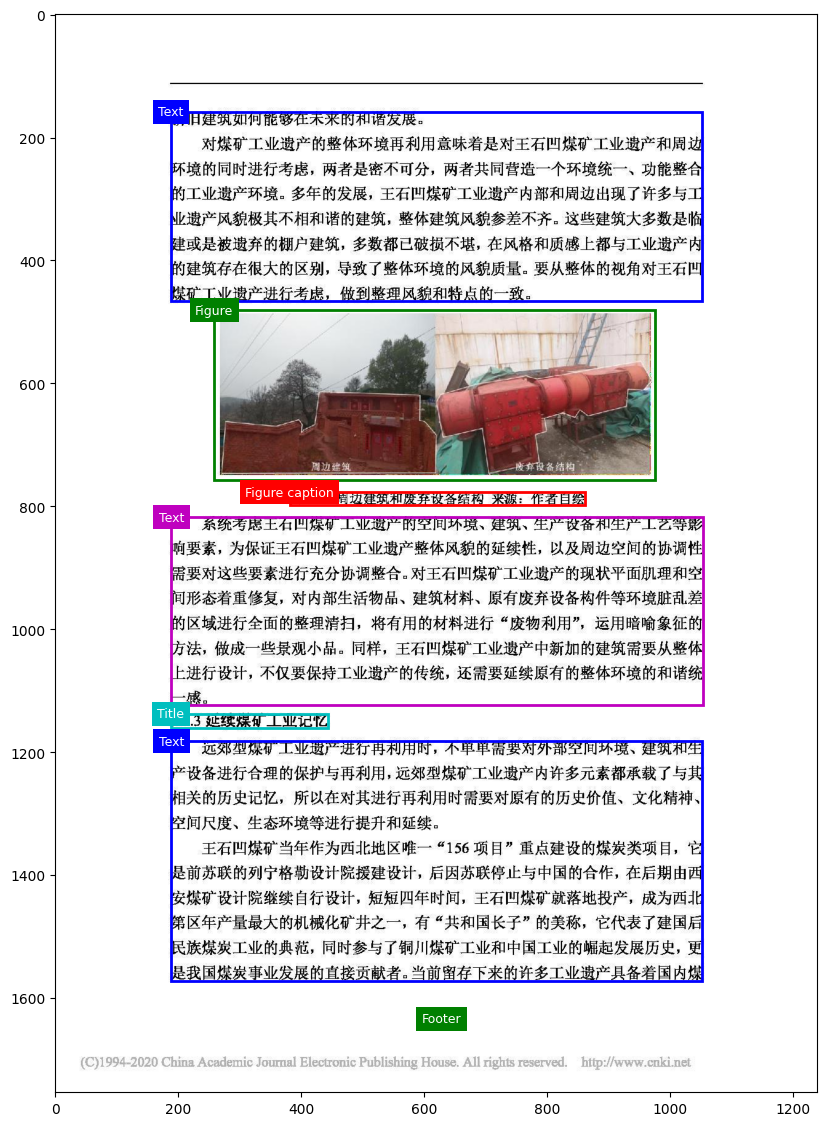

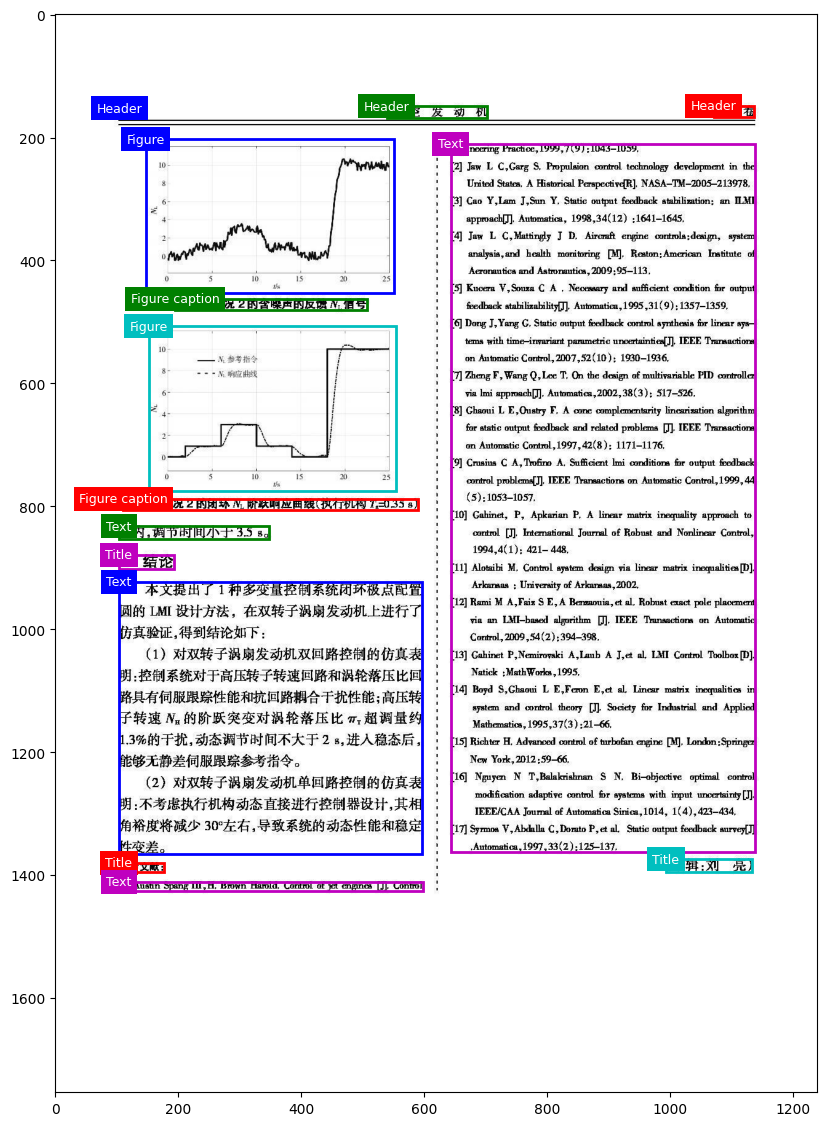

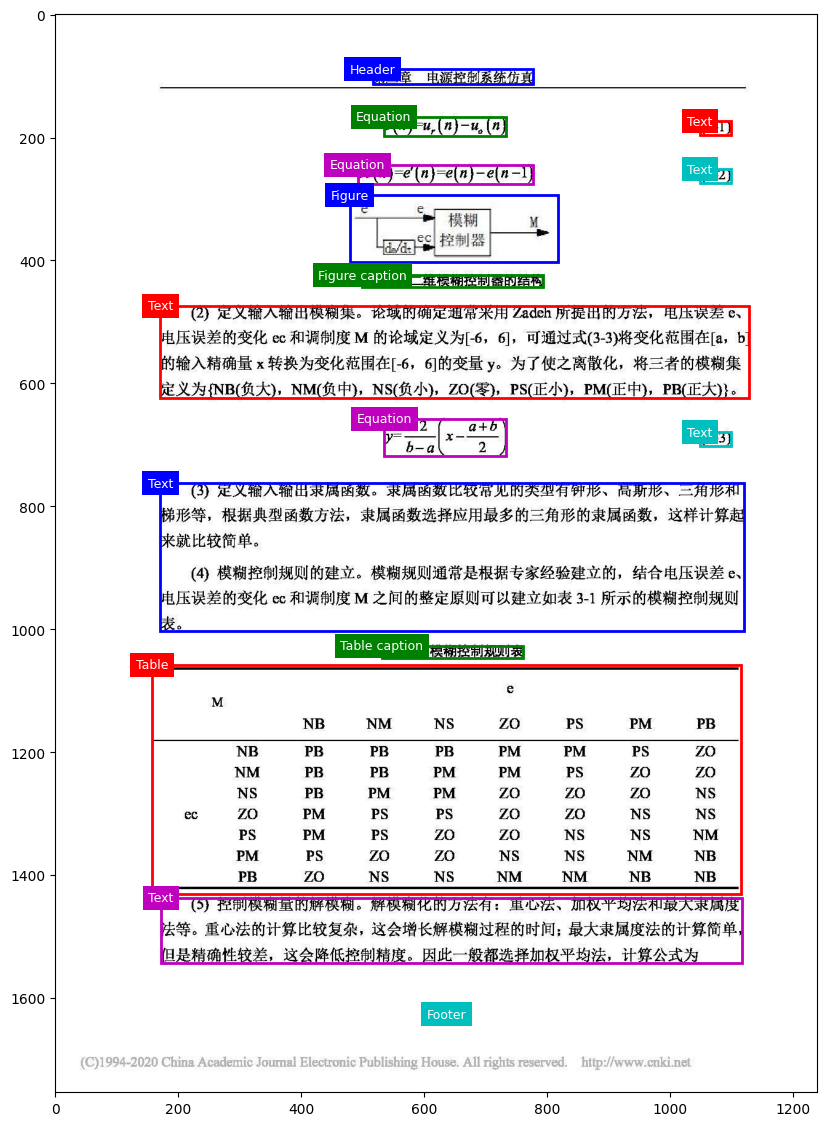

In [44]:

# image_path = 'data/train_0196.jpg'
# image = Image.open(image_path)

# 显示图像
for i in range(len(images)):
    fig, ax = plt.subplots(figsize=(16, 14))
    fig = ax.imshow(images[i])
    show_bboxes(fig.axes,bboxs[i],labels[i])

In [30]:
images

[]